In [63]:
### 3 Level System ####

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import math
import cmath
import scipy.constants as sc
import time
%matplotlib inline



def Euler(rho,L,Ld,t):
    temp = np.cos(wl_1*t)
    for i in range(1,len(t)):
        H=Ham(t[i-1],temp[i-1])
        H = np.dot(np.dot(Uni(t[i-1]),H), Unic(t[i-1]))
        rho[i] = rho[i-1]+del_t*(-1j*(np.dot(H,rho[i-1])-np.dot(rho[i-1],H)) \
                       -.5*(np.dot(Ld,np.dot(L,rho[i-1])) + np.dot(rho[i-1], np.dot(Ld,L))) + np.dot(L,np.dot(rho[i-1], Ld)))                                
    return(rho)

### Two Level Atom ###                                
#create a list of times to simulate                                
del_t = 1e-12
t = np.arange(0,25e-7,del_t)           


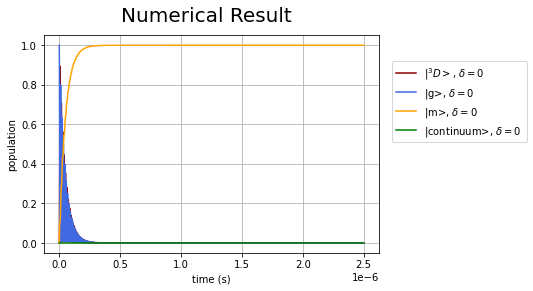

0.000993967056274414
92.02906394004822
1.3603887557983398
total time 93.39044666290283
probability of ionization after .1 us 1.2502698327150332e-06


In [64]:
t0=time.time()                        

#create empty density matrix list and initial state
n=4 ## dimension of Hamiltonian
rho = np.zeros((len(t),n,n),dtype=complex)
rho[0] = [[1,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]] # initial conditions


##create Hamiltonian, in this example we have 2 level system with coupling electric field

w_1 = 725e12
d_1=0 ##detuning
wl_1 = w_1-d_1
w_2 = 270e12
d_2 = 0
wl_2 = w_2-d_2
w_3 = 1260e12

gam_1=1.46e6

## given beam parameters get a rabi freq W
I = 2*.00005/(np.pi*(80e-6)**2)
E = np.sqrt(2*I/(sc.c*sc.epsilon_0))
a = 1/(4*np.pi*sc.epsilon_0*sc.hbar*sc.c)
mu = np.sqrt(gam_1*3*sc.c**2/(4*a*w_1**3))
W_1 = E/sc.hbar*mu ##Rabi Frequency

gam_2=4e7

## given beam parameters get a rabi freq W
I = 0*.0005/(np.pi*(200e-6)**2)
E = np.sqrt(2*I/(sc.c*sc.epsilon_0))
a = 1/(4*np.pi*sc.epsilon_0*sc.hbar*sc.c)
mu = np.sqrt(gam_2*3*sc.c**2/(4*a*w_2**3))
W_2 = E/sc.hbar*mu ##Rabi Frequency

gam_3 = 50


H_0 = np.zeros((n,n), dtype= complex)
H_1 = np.zeros((n,n), dtype= complex)
U = np.zeros((n,n), dtype=complex)
Uc = np.zeros((n,n), dtype=complex)
L = np.zeros((n,n), dtype=complex)
Ld = np.zeros((n,n), dtype=complex)

L[2,0] = np.sqrt(gam_1)
Ld[0,2] = np.sqrt(gam_1)
L[1,0] = np.sqrt(gam_2)
Ld[0,1] = np.sqrt(gam_2)
L[3,2] = np.sqrt(gam_3)
Ld[2,3] = np.sqrt(gam_3)

H_0[1,1] = w_2
H_0[2,2] =  w_1
H_0[3,3] = w_3

def Ham(t,c):
    H_1[2,0] = H_1[0,2] = W_1*c
    return H_1

def Uni(t):
    for i in range(n):
        U[i,i] = np.exp(-1j*H_0[i,i]*t)
    return U

def Unic(t):
    for i in range(n):
        Uc[i,i] = np.exp(1j*H_0[i,i]*t)
    return Uc

                                                                           
t1=time.time()
result = Euler(rho,L,Ld,t)
t2=time.time()

##Plotting Results###
fig = plt.figure()
fig.suptitle('Numerical Result', fontsize=20)
ax = fig.gca()


plt.plot(t,result[:,2,2].real, color = 'darkred',label="$|^3D>$, $\delta = 0$ ")#
plt.plot(t,result[:,0,0].real, color = 'royalblue',label="|g>, $\delta = 0$ ")
plt.plot(t,result[:,1,1].real, color = 'orange',label="|m>, $\delta = 0$ ")
plt.plot(t,result[:,3,3].real, color = 'green',label="|continuum>, $\delta = 0$ ")

plt.xlabel("time (s)")
plt.ylabel("population")

# plt.plot(t, (np.cos(Wp2*t/2))**2+(d2/Wp2)**2*(np.sin(Wp2*t/2))**2, color = 'royalblue',label="|g>, $\delta = 0$ ")
plt.legend(loc=(1.04,.51))
plt.grid()
plt.show()

t3=time.time()
print(t1-t0)
print(t2-t1)
print(t3-t2)

print('total time', t3-t0)
print('probability of ionization after .1 us', result[-1,3,3].real)

In [56]:
#laser e field
e0 = 8.854187e-12
p = 3
w = 30e-6
I = p/(np.pi*w**2/2)
E = np.sqrt(2*I/(sc.c*e0))
cs = 100e7*1e-28
fl = E**2/(8*np.pi)*.5*323
cs*fl*sc.c

308.01569092373194

In [57]:
cs = 100e7*1e-28
fl = E**2/(8*np.pi)*.5*323
cs*fl*sc.c

308.01569092373194